# Chapter 32
# Properties of Time Series 


## Introduction

Time series are an extremely common data type. Just a few of the many applications of time series analysis include:

- **Demand forecasting:** Electricity production, Internet bandwidth, Traffic management, Inventory management
- **Medicine:** Time-dependent treatment effects, EKG, EEG
- **Engineering and Science:** Signal analysis, Analysis of physical processes
- **Capital markets and economics:** Seasonal unemployment, Price/return series, Risk analysis

In this chapter, we will explore some fundamental properties of time series data, in particular:  

- How time series data differ from non-time ordered data.      
- Basic properties of time series:      
  - Correlation properties of time series.      
  - Properties of random walks.  
  - Time series with trends.    
  - Seasonal properties of time series.   
- How to perform and understand the decomposition of time series.    

****
**Resources:** Here is a selection of resources you can use to go deeper into time series analysis with Python:

1. If you would like more information and examples for working with time series data in [Python Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html).  
2. The Python [pmdarima package user quide](https://alkaline-ml.com/pmdarima/user_guide.html) provides some hands-on tutorial material.    
3. The Python [KATS time series package](https://facebookresearch.github.io/Kats/) provides a number of state-of-the-art time series methods and models.  
4. The go-to book is *Forecasting, Principles and Practice*, 2nd ed. by Rob J Hyndman and George Athanaspoulos, and is available as an [online book](https://otexts.com/fpp2/).   
5. [Darts](https://unit8co.github.io/darts/index.html), a newly released Python time series package combines state-of-the-art linear models with some powerful deep learning models.  
****

## Short History of Time Series Analysis

The history of time series analysis starts with the pioneering work of George Udny Yule (1927) and Gilbert Walker (1931). Both Yule and Walker developed auto-regressive (AR) models for stochastic time series.

<img src="images/George_Udny_Yule.jpg" alt="Drawing" style="width:200px; height:250px"/>
<center>George Yule; time series pioneer</center>

Mathematical prodigy, Norbert Weiner, invented filters for stochastic time series processes during the Second World War. Weiner worked at MIT and was assigned to a project to improve the accuracy of anti-aircraft guns using the noisy radar signals of the day. He published his seminal paper on the subject in 1949. If you have recently used a mobile phone or streamed video or audio you are benefiting from Wiener's research!

<img src="images/Norbert_wiener.jpg" alt="Drawing" style="width:200px; height:250px"/>
<center>Norbert Weiner: Invented time series filter</center>

The exponential smoothing methods of time series analysis and forecasting were first published by Robert Goodell Brown in 1956, and Charles C. Holt in 1957.

George Box and Gwilym Jenkins fully developed a statistical theory  of time series by extending the work of Yule and Walker in the 1950s and 1960s. This work was fully developed in their seminal 1970  book. Their theory included the autoregressive moving average (ARMA) model and the autoregressive integrated moving average (ARIMA) models we use in this notebook.

George Box was married to Joan Fisher Box, an outstanding statistician in her own right and daughter of Ronald Fisher. 

<img src="images/GeorgeEPBox.jpg" alt="Drawing" style="width:200px; height:250px"/>
<center>George Box fully developed the ARIMA model</center>

<img src="images/BoxJenkins.jpg" alt="Drawing" style="width:175px; height:250px"/>
<center>Seminal book: by Box and  Jenkins</center>


## How Are Time Series Data Different?

Time series data are different from the data types we have encountered so far. Up until now, we have been able to construct models using the assumption of **independent and identically distributed (iid) errors**. When sampling such data order does not matter.

However, for time series data, the observations are ordered by time and the observed values are **serially correlated**. For serially correlated data, the value of an observation will depend on one or more of the previous observations. Just a few of the many examples of data exhibiting serial correlation of the values include      
- Temperature forecasts, where the future values are correlated with the current values. 
- The opening price of a stock is correlated with the price at the previous close. 
- The daily sales volume of a product is correlated with the previous sales volume. 
- A medical patient's blood pressure reading is correlated with the previous observations.   

Given the serial correlation common in time series data, we will need models which account for this behavior. In this lesson our focus will be on a class of models known as **autoregressive integrative moving average (ARIMA) models**. These are linear models which account for the serial correlation in time series data.     

> **Note:** In this lesson we will work with the time series tools available in the Python Pandas, [statsmodels](http://www.statsmodels.org/stable/user-guide.html#time-series-analysis) and [pmdariama](https://alkaline-ml.com/pmdarima/) packages. However, the state-of-the-art time series models are often found in R packages. You can find considerable information on state-of-the-art time series forecasting in the blogs, R packages and books on time series with R on [Rob Hyndman's](https://robjhyndman.com/) web site. 



## Working with Time Series in Pandas

The Pandas package has significant capabilities for manipulation of time series data. The key to working with time series data is the index of the Pandas series or data frame. The index contains the [date-time information](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) or [time delta (interval) information](https://pandas.pydata.org/pandas-docs/stable/user_guide/timedeltas.html). 

Let's start with a simple univariate time series example. A univariate time series can be represented as a Pandas series, with the appropriate index. 

> **Note:** The use of a [Pandas Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) object to hold a univariate time series may seem redundant or confusing. The time series is a time-ordered sequence of data values. Whereas, the Pandas Series object is a univariate data structure. A Pandas Series object contains time series data when an appropriate time series index is used. 

The code in the cell below creates a series of sinusoidal values. Execute this code and examine the results.

In [1]:
from math import sin
import pandas as pd
import numpy as np
import numpy.random as nr
from math import pi
from scipy.stats import zscore
import sklearn.linear_model as lm
import statsmodels.tsa.seasonal as sts
import scipy.stats as ss
import statsmodels.tsa.arima_process as arima
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
import pmdarima as pm
import statsmodels.graphics.tsaplots as splt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

%matplotlib inline

ts = pd.Series([sin(x/30.0) for x in range(366)])
ts.head(20)

0     0.000000
1     0.033327
2     0.066617
3     0.099833
4     0.132939
5     0.165896
6     0.198669
7     0.231222
8     0.263517
9     0.295520
10    0.327195
11    0.358506
12    0.389418
13    0.419898
14    0.449912
15    0.479426
16    0.508407
17    0.536823
18    0.564642
19    0.591835
dtype: float64

The object you created is a series of floating point values. However, this is not yet a time series object, since there is no time indexing. For that, we need to add a time index or time difference index.

The code in the cell below adds a new set of index values to the Pandas Series object. Execute this code and examine the results. 

In [2]:
ts.index = pd.date_range(start = '1-1-2016', end = '12-31-2016', freq = 'D')
ts.head(20)

2016-01-01    0.000000
2016-01-02    0.033327
2016-01-03    0.066617
2016-01-04    0.099833
2016-01-05    0.132939
2016-01-06    0.165896
2016-01-07    0.198669
2016-01-08    0.231222
2016-01-09    0.263517
2016-01-10    0.295520
2016-01-11    0.327195
2016-01-12    0.358506
2016-01-13    0.389418
2016-01-14    0.419898
2016-01-15    0.449912
2016-01-16    0.479426
2016-01-17    0.508407
2016-01-18    0.536823
2016-01-19    0.564642
2016-01-20    0.591835
Freq: D, dtype: float64

You can see that the index is now the date-time for each value. This Pandas series is now an actual time series. 

Let's plot the time series. The code in the cell below plots the values of the time series against the index. Notice that there is no need to explicitly specify the values for the x-axis as these values are implied by the index of the Pandas Series object. Execute the code and examine the results. 

Text(0.5, 0, 'Date')

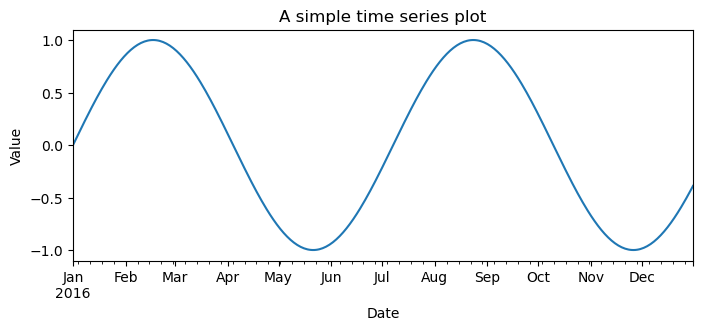

In [3]:
_,ax = plt.subplots(figsize=(8,3))
ts.plot(ax=ax)
ax.set_title('A simple time series plot')
ax.set_ylabel('Value')
ax.set_xlabel('Date')

You can see that the time axis is labeled automatically. 

Pandas provides many methods to [manipulate and transform time series](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html). For example, one can subset a time series using a range of time values from the index. The code in the cell below takes a subset of the time series by specifying a date range and displaying a plot. Execute this code and examine the result. 

Text(0.5, 0, 'Date')

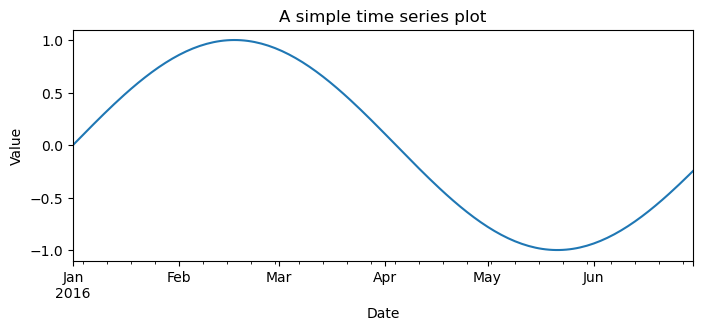

In [4]:
_,ax = plt.subplots(figsize=(8,3))
ts['1/1/2016':'6/30/2016'].plot(ax=ax)
ax.set_title('A simple time series plot')
ax.set_ylabel('Value')
ax.set_xlabel('Date')

Notice that the plot covers the subset of dates specified. 

## Basic Time Series Properties

In this section, we will explore some basic properties of time series. Understanding these properties will help you understand the fundamental properties of time series, including    
1. Random **white noise series** are time series of random uncorrelated values. The is no predictive information in a white noise series.    
2. The **correlation** properties of time series, differentiate these data from unordered data. We can deduce several important properties of time series from the study of their correlation properties.   
3. The concept of **stationarity** is a foundation on which many time series models rely. In simple terms, a stationary time series has statistical properties that are invariant in time.  
3. Time series with **random walks** have drift  
4. Long-term **trend** is a common property of time series.    

### Properties of White Noise Series

A random series is **independent identically distributed (iid)** noise drawn from a Normal distribution. Such a series is said to be a **white noise** series. Since the series is iid there is no correlation from one value to the next. We can write a **discrete** white noise time series as just:

$$X(t) = (w_1, w_2, w_3, \dots, w_n)\\
where\\
w_t \sim \mathbb{N}(0, \theta)$$

Notice that the standard deviation and therefore the variance of the series, $\theta$, is constant in time. We say that a time series with a constant variance is **stationary**. The statistical properties of a stationary time series do not vary with time. 

Further, the values of the time series are given at specific or discrete times, making this a **discrete time series**. In computational time series analysis, we nearly always work with discrete time series. Some time series are inherently discrete including, the unemployment rate average over a month, and the daily closing price of a stock. Even if the underlying time series is continuous, we typically work with **values sampled at discrete points in time**. For example, temperature is a continuous variable, but we will generally work with sampled values, such as hourly measurements. 

The code in the cell below creates a time series from an iid Normal distribution with mean zero. Execute this code and note the attributes and the plot.

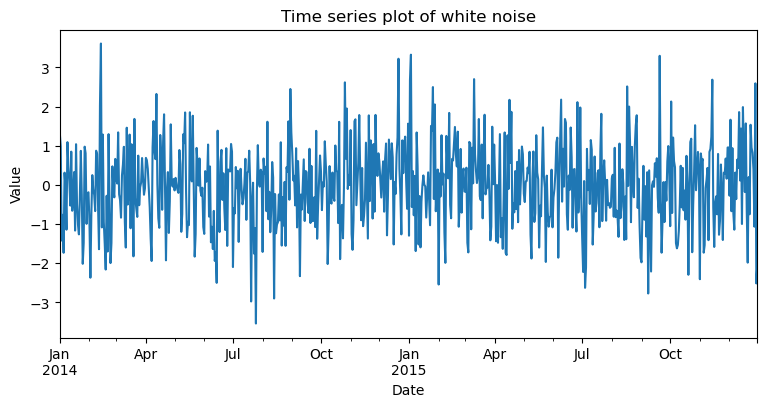

In [5]:
def plot_ts(ts, lab = ''):
    _,ax = plt.subplots(figsize=(9,4))
    ts.plot(ax=ax)
    ax.set_title('Time series plot of ' + lab)
    ax.set_ylabel('Value')
    ax.set_xlabel('Date')

nr.seed(3344)
white = pd.Series(nr.normal(size = 730),
                 index = pd.date_range(start = '1-1-2014', end = '12-31-2015', freq = 'D'))
plot_ts(white, 'white noise')

Notice that the values of the time series seem to wander randomly around zero, with no particular trend. 

Next, let's look at the distribution of the time series values. The code in the cell below plots the histogram and Q-Q Normal plot of the values of the time series. Run this code and examine the results.  

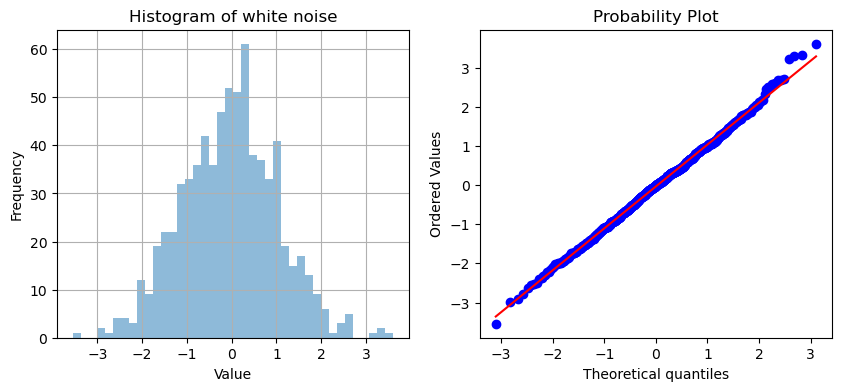

In [6]:
def dist_ts(ts, lab = '', bins = 40):
    _,ax = plt.subplots(1,2,figsize=(10,4))
    ## Plot the histogram with labels
    ts.hist(ax = ax[0], bins = bins, alpha = 0.5);
    ax[0].set_xlabel('Value');
    ax[0].set_ylabel('Frequency');
    ax[0].set_title('Histogram of ' + lab);
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax[1]);

dist_ts(white, 'white noise')    

As expected, the values of the white noise series are Normality distributed. When examining these plots keep in mind there are only 365 values, so we should expect quite a lot of random variation. 

### Autocorrelation of White Noise Series

The values of the white noise series are iid, so we do not expect the values to show any dependency over time. In time series analysis we measure dependency using **autocorrelation**. Autocorrelation is the correlation of a series with itself **lagged** (offset in time) by some number of time steps. Autocorrelation at lag k can be written as    

$$\rho_k = \frac{\gamma_k}{n \sigma^2} = \frac{1}{n \sigma^2} \sum_{t = 1}^N (y_{t} - \mu) \cdot (y_{t-k} - \mu)$$      
Where:   
\begin{align}
y_t &= observation\ at\ time\ t\\ 
k &= lag\\
\gamma_k &= covariance\ lag\ k\\
\mu &= mean\ of\ the\ series\\ 
\sigma^2 &= variance\ of\ the\ series = \frac{1}{n-1}\Sigma_{t = 1}^N (y_{t} - \mu) \cdot (y_{t} - \mu)
\end{align}

Notice that for any series, $\rho_0 = 1$. In other words, the autocorrelation of a series at **lag zero** equals 1.0. 
T
We can also define a second order **partial autocorrelation**. The Partial autocorrelation at lag k is the correlation that results from removing the effect of any correlations due to the terms at smaller lags.

Let's plot the autocorrelation function (acf), using [statsmodels.graphics.tsaplots.plot_acf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html), and partial autocorrelation function (pacf), using [statsmodels.graphics.tsaplots.plot_pacf](https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html), of the white noise series. Run the code in the cell below to compute and plot these functions. 

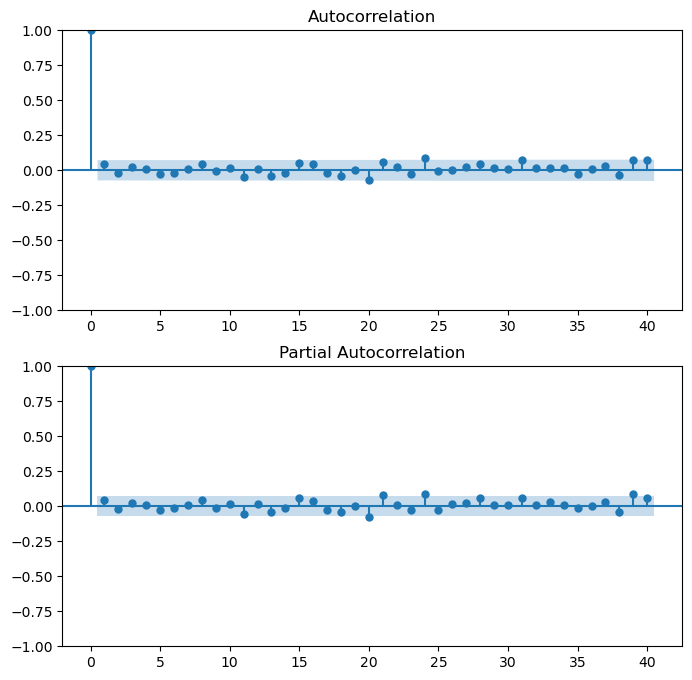

In [7]:
def auto_partial_corr_plot(ts):
    _,ax = plt.subplots(2,1, figsize=(8,8))
    _=splt.plot_acf(ts, lags = 40, ax=ax[0]);
    _=splt.plot_pacf(ts, lags = 40, method='yw', ax=ax[1]);

auto_partial_corr_plot(white)

As expected the white noise series only has significant autocorrelation and partial autocorrelation values at lag zero. There are no significant partial autocorrelation values. The shaded blue area on these plots shows the **95% confidence interval**. 

****
**Note:** The Python statsmodels package uses the engineering convention for displaying partial autocorrelation. The value at 0 lag, which always must be 1.0, is displayed. In many statistical packages, including R, this 0 lag value is not displayed. This difference in conventions can lead to a lot of confusion. 
****

### Hypothesis tests on autocorrelation      

Visually, we can see that the ACF and PACF for the white noise series have values largely within the 95% confidence interval of zero. While visual inspection is always a good idea, in some marginal cases, it will be worth doing a formal hypothesis test to determine if a series is in fact white noise. These tests are performed on the distribution of the ACF values over some number of lags. This distribution turns out to be approximate $\chi^2$ making the compuation of p-values simple. 

There are a number of such tests, several of which are supported in the [Statsmodels Regression Diagnostics and Specification Tests](https://www.statsmodels.org/dev/diagnostic.html#autocorrelation-tests) packages. Here, we will focus on the [Ljung-Box Q statistic](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html#statsmodels.stats.diagnostic.acorr_ljungbox), which is known to have a distribution that is a good approximatiion to the $\chi^2$ distribution. The Ljung-Box Q statistic is based on autocorrelation of at multiple lag values, $\rho_i$. The null hypothesis is that there is no serial correlation between the values, and that the values are independently distributed. The alternative hypothesis is that there is serial correlation giving high values of the Ljung-Box Q statistic and a small p-value. The Ljung-Box Q statistic is computed from the following relationship:           

$$Q = n(n+2) \sum_{k=1}^h \frac{\hat{\rho}^2_2}{n-k}$$

> **Exercise 32-1:** In the cell below create and execute code to do the following:    
> 1. Create a monthly series `(freq = 'M')` of white noise plus 2.0 times a sinusoidal component, with a 12-month period. Use a date range from January 2001 to January 2016. Name your series `ts_periodic`. The white noise component should have a mean of 0 and a standard deviation of 1.0. **Hint:** You will need to use the `pi` constant from the `math` library. The sinusoidal component will be `2 * numpy.sin(pi*x/6)`. Use `numpy.random.seed(6677)` to set the random number seed.    
> 2. Create a time series plot of the result. Then plot the acf and pacf of the time series for 40 lags.   

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_16009/101626761.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_range = pd.date_range(start='1-1-2001', end='12-31-2015', freq='M')


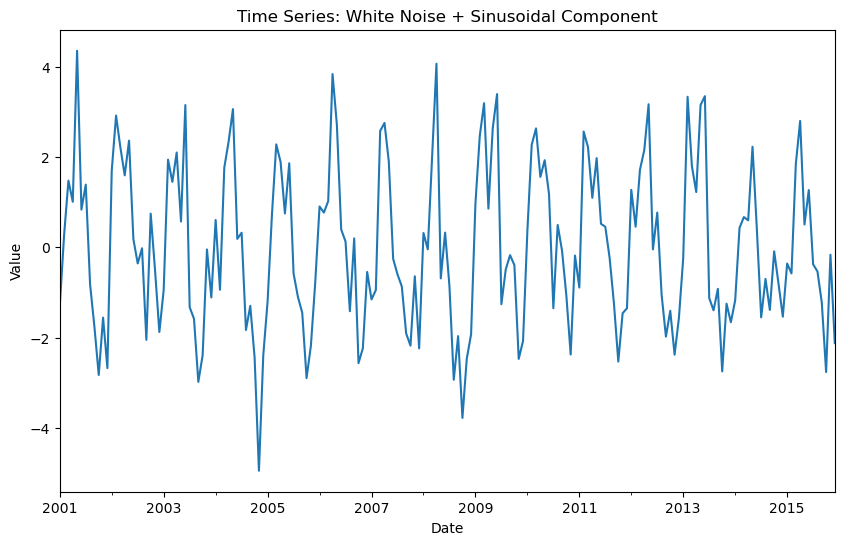

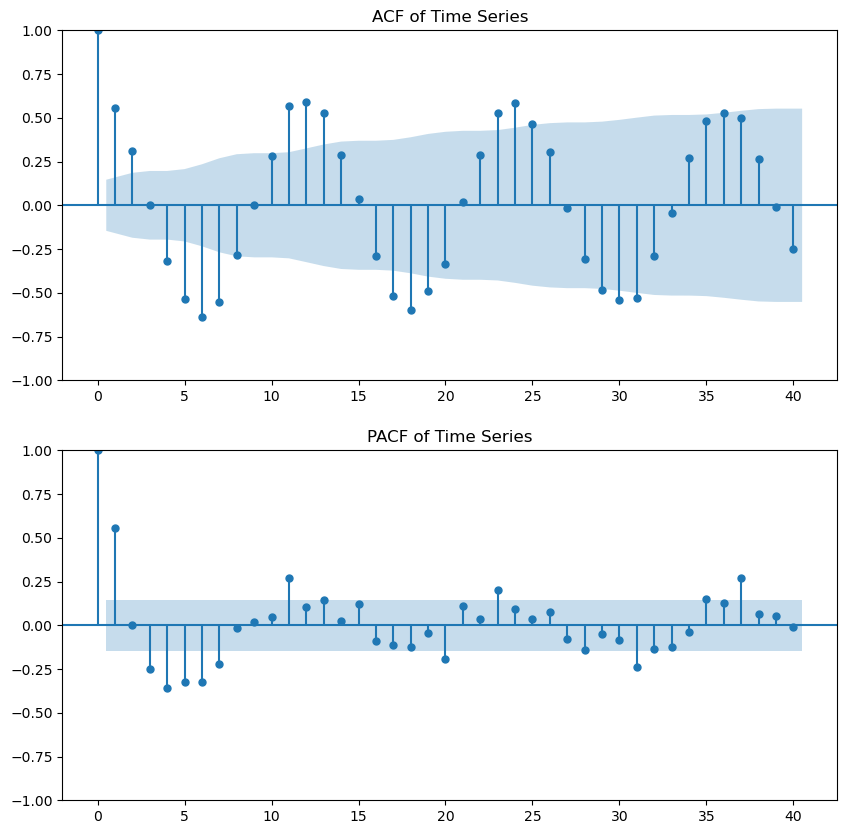

In [8]:
# Create the monthly series
np.random.seed(6677)  # Set random seed
white_noise = np.random.normal(loc=0, scale=1, size=180)  # White noise from 2001 to 2016
time_range = pd.date_range(start='1-1-2001', end='12-31-2015', freq='M')

# Sinusoidal component with a 12-month period
sinusoidal_component = 2 * np.sin(2 * np.pi * np.arange(len(time_range)) / 12)

# Combine white noise and sinusoidal component
ts_periodic = pd.Series(white_noise + sinusoidal_component, index=time_range)

# Plot the time series
plt.figure(figsize=(10, 6))
ts_periodic.plot()
plt.title('Time Series: White Noise + Sinusoidal Component')
plt.ylabel('Value')
plt.xlabel('Date')
plt.show()

# Plot ACF and PACF
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
splt.plot_acf(ts_periodic, lags=40, ax=axes[0])
splt.plot_pacf(ts_periodic, lags=40, ax=axes[1], method='yw')
axes[0].set_title('ACF of Time Series')
axes[1].set_title('PACF of Time Series')
plt.show()


> 3. Apply the [acorr_ljungbox](https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.acorr_ljungbox.html) function to the white noise series and the periodic time series with `lags=40` and `model_df=0`.     

In [9]:
# Ljung-Box test
ljung_box_results = sm.stats.acorr_ljungbox(ts_periodic, lags=40, model_df=0)
print(ljung_box_results)


        lb_stat      lb_pvalue
1     56.022085   7.166150e-14
2     73.446496   1.125372e-16
3     73.448445   7.791137e-16
4     92.041985   4.848738e-19
5    145.390235   1.277801e-29
6    221.536340   4.893686e-45
7    279.103408   1.743895e-56
8    294.473478   6.175505e-59
9    294.473826   3.878031e-58
10   309.745733   1.350665e-60
11   371.970044   5.396398e-73
12   440.301438   1.081702e-86
13   494.994742   1.691982e-97
14   510.990114  4.336588e-100
15   511.242200   2.363489e-99
16   528.328541  3.445250e-102
17   581.863677  9.827671e-113
18   653.613749  3.882543e-127
19   702.139019  1.265584e-136
20   724.880466  1.198011e-140
21   724.937960  7.111478e-140
22   742.049825  1.028083e-142
23   799.952587  3.546990e-154
24   871.863334  1.320694e-168
25   917.311361  1.950950e-177
26   937.394702  6.744331e-181
27   937.466420  3.952793e-180
28   958.082691  1.041066e-183
29  1008.423799  1.435905e-193
30  1072.034058  3.092613e-206
31  1133.555214  1.830189e-218
32  1152

> Examine these results and answer the following questions:     
> 1. What do the ACF and PACF tell you about the periodicity of the series?      
> 2. Does the significance of the periodic series of the acf and pacf change with lag?     
> 3. Examine Ljung-Box Q statistic and p-values for the white noise series and the period series. What can you say about the significance of serial correlation for these two series?    

> **Answers:**  
> 1. The ACF shows significant spikes at lags that correspond to the seasonal periodicity (around 12 months, 24 months, etc.). This indicates the presence of a repeating pattern in the data. The PACF shows that the correlation gradually decreases, with significant spikes appearing at lag 1 and then at intervals of 12 months. This suggests a clear seasonal structure, confirming the presence of periodic components.          .     
> 2. Yes, the significance of the periodic series in the ACF and PACF decreases with increasing lag. However, the pattern repeats roughly every 12 lags (monthly seasonality), indicating the sinusoidal component's contribution.      
> 3.  The Ljung-Box test results show very small p-values, indicating that the null hypothesis of no serial correlation is rejected. This implies that there is significant serial correlation present in the periodic time series. The presence of a sinusoidal component likely drives this correlation, while the white noise series, in contrast, would generally have a much lower serial correlation if it were isolated.    

### Random Walks

A **random walk** is defined by the sum of a white noise series. Since the random walk is the sum of all previous white noise terms, we say a random walk is **integrative**. In other words, the value of the random walk is the **cumulative sum of the preceding white noise series**. 

$$y_t = y_{t-1} + w_t$$

Where the $w_t$ is Normally distributed with variance $\sigma$: 

$$w_t \sim \mathbb{N}(0,\sigma)$$

The **innovations** of the random walk, $w_t$, are the **first order differences** of the time series values:   

$$w_t = y_t - y_{t-1}$$ 

Or, with a little bit of algebra, it is easy to show that:    

$$y_t = y_0 + w_t + \sum_{i=1}^{t-1} w_i$$

Where $y_0$ is an initial value.   

The forgoing sum accumulates over the history of the time series. This property leads to the term **integrative** being used for random walk components of time series. This is an example of a **stochastic process**, having random behavior over time.    

But note that the covariance of a random walk increases with time and is not bounded.

$$\gamma_k = Cov(y_t, y_{t+k}) = t \sigma^2 \rightarrow \infty\ as\ t \rightarrow \infty$$

Therefore, the random walk is **not stationary** . 

The code in the cell below computes a random walk series by taking the cumulative sum over Normally distributed innovations. Run this code and examine the results. 

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_16009/405149871.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start = start, end = end, freq = freq)


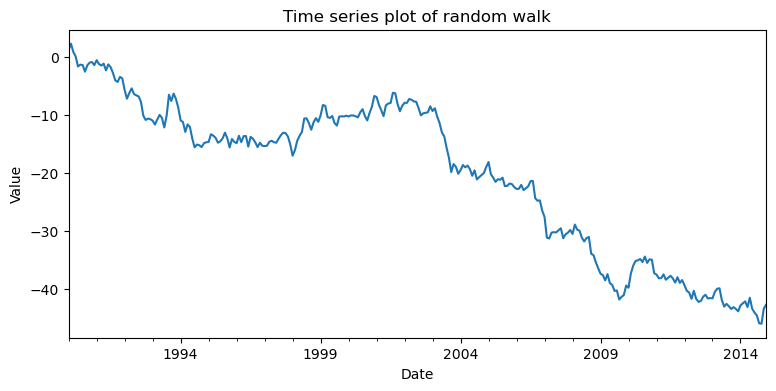

In [10]:
nr.seed(3344)
def ran_walk(start = '1-1990', end = '1-2015', freq = 'M', sd = 1.0, mean = 0):
    dates = pd.date_range(start = start, end = end, freq = freq)
    walk = pd.Series(nr.normal(loc = mean, scale = sd, size = len(dates)),
                    index = dates)
    return(walk.cumsum())
walk = ran_walk()   
plot_ts(walk, 'random walk')

The random walk wanders back and forth somewhat randomly. A random walk may appear to follow a trend, but there is no reason to believe the trend will continue. 

> **Exercise 32-2:** What does the distribution of values of the random walk time series look like? What about the ACF and PACF of the random walk? In the cell below, create and execute the code to examine the probability distribution, ACF and PACF of the random walk. 

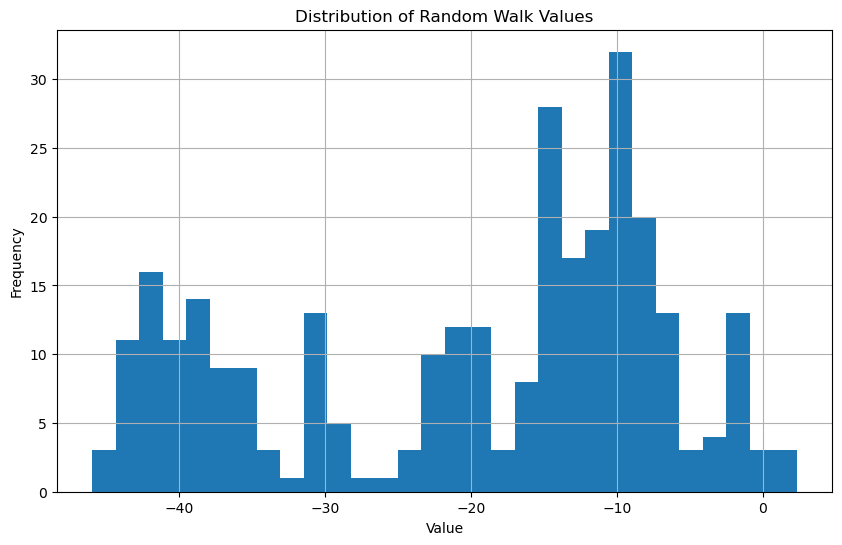

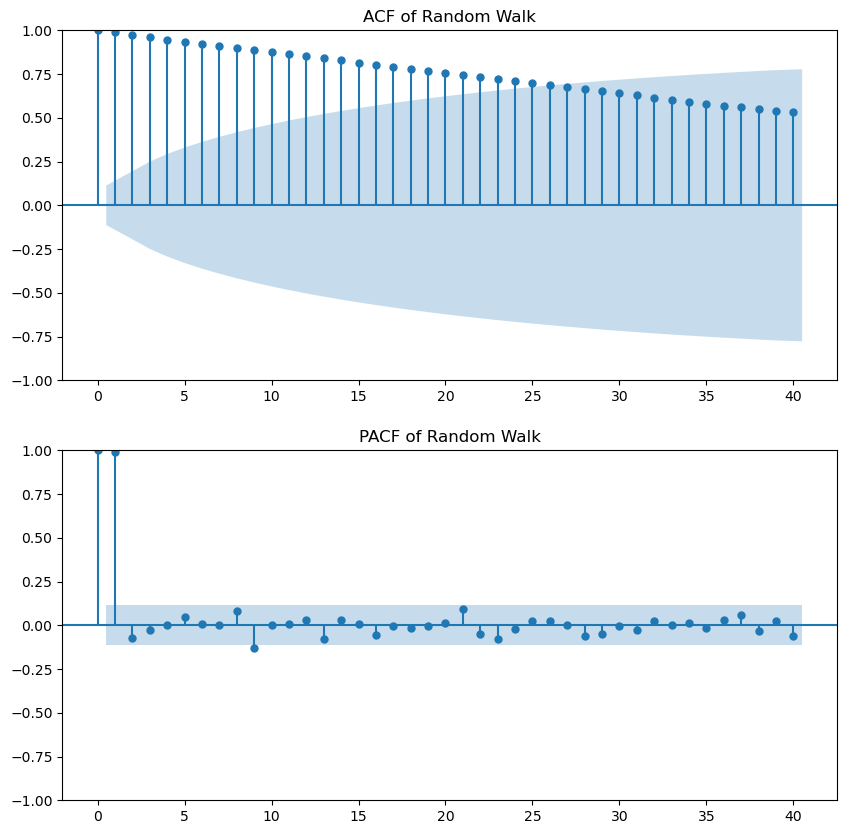

In [11]:
# Plot the distribution of the random walk values
plt.figure(figsize=(10, 6))
walk.hist(bins=30)
plt.title('Distribution of Random Walk Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Plot ACF and PACF of the random walk
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
splt.plot_acf(walk, lags=40, ax=axes[0])
splt.plot_pacf(walk, lags=40, ax=axes[1], method='yw')
axes[0].set_title('ACF of Random Walk')
axes[1].set_title('PACF of Random Walk')
plt.show()


> Examine these results and answer the following questions:    
> 1. How close to Normally distributed are the values of the random walk?    
> 2. How are the properties of the ACF and PACF different from those of the white noise series and why?    
> 3. How can you explain the difference between the ACF and PACF in terms of the serial correlation properties of a random walk?    

> **Answers:**   
> 1.  The histogram shows that the distribution of the random walk values is not perfectly normal. While the distribution has some central tendency, it is skewed, with more values concentrated on the negative side. This is expected for a random walk as it tends to drift over time. As the walk progresses, it is influenced by the cumulative sum of previous steps, which can cause deviations from normality.   
> 2.  In a random walk, the ACF shows a slow decay, indicating a high degree of autocorrelation between the values at different lags. This is because each value in the random walk is the cumulative sum of previous values, so there is strong correlation over time.
In contrast, for white noise, the ACF would drop off quickly after lag 0, showing little to no correlation between values at different times.
The PACF of the random walk has a significant spike at lag 1 and then flattens out, which is typical of processes like a random walk, where the first lag explains most of the variation, but subsequent lags do not.    
> 3. The ACF in a random walk decreases gradually because the values are highly dependent on all preceding values due to the cumulative nature of the process. This leads to long-term persistence in the data, with each step depending on all previous steps.
The PACF, on the other hand, shows a large spike at lag 1 because, in a random walk, the value at any time is directly related to the previous value (lag 1). The partial correlation drops off after the first lag because, beyond this point, the cumulative effect of past values becomes less individually distinguishable.   

### White Noise Series with Trend

What happens when we add a trend to the white noise series? Run the code in the cell below which adds a linear trend to a white noise series. 

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_16009/3823214558.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start = start, end = end, freq = freq)


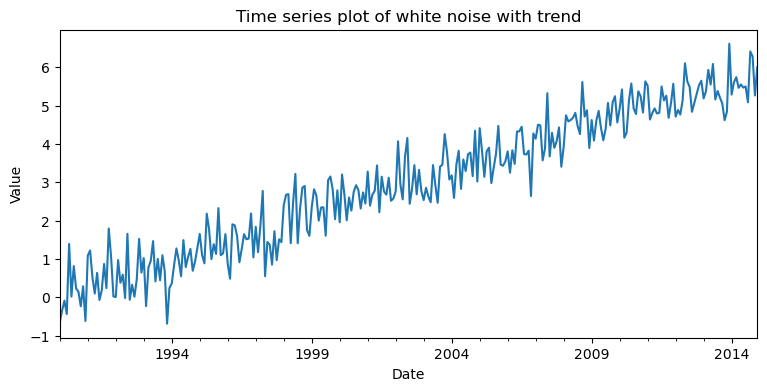

In [12]:
nr.seed(6677)
def trend(start = '1-1990', end = '1-2015', freq = 'M', slope = 0.02, sd = 0.5, mean = 0):
    dates = pd.date_range(start = start, end = end, freq = freq)
    trend = pd.Series([slope*x for x in range(len(dates))],
                    index = dates)
    trend = trend + nr.normal(loc = mean, scale = sd, size = len(dates))
    return(trend)
                              
trends = trend()   
plot_ts(trends, 'white noise with trend')

As expected, the time series trends upward with a linear trend with iid Normal deviations. 

Run the code in the cell below to examine the distribution of values in this time series.

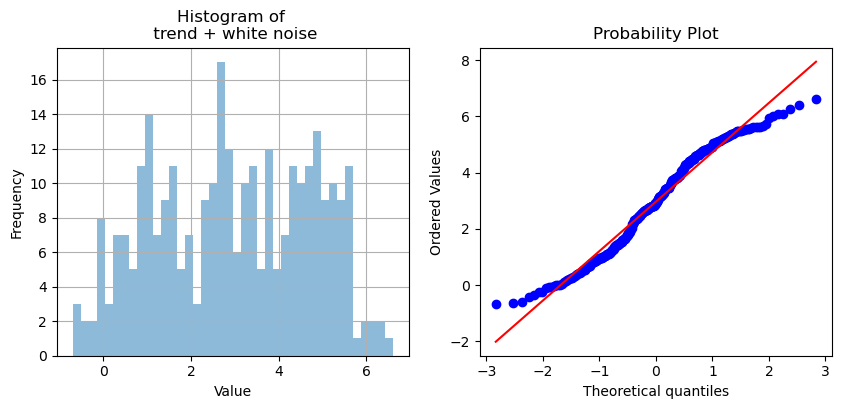

In [13]:
dist_ts(trends, lab = '\n trend + white noise')

The distribution shows some skew when compared to a Normal distribution. You can observe the skew as the 'S' shaped curve in the quantiles values.  

How does adding a trend change the ACF and PACF? Run the code in the cell below and examine the results. 

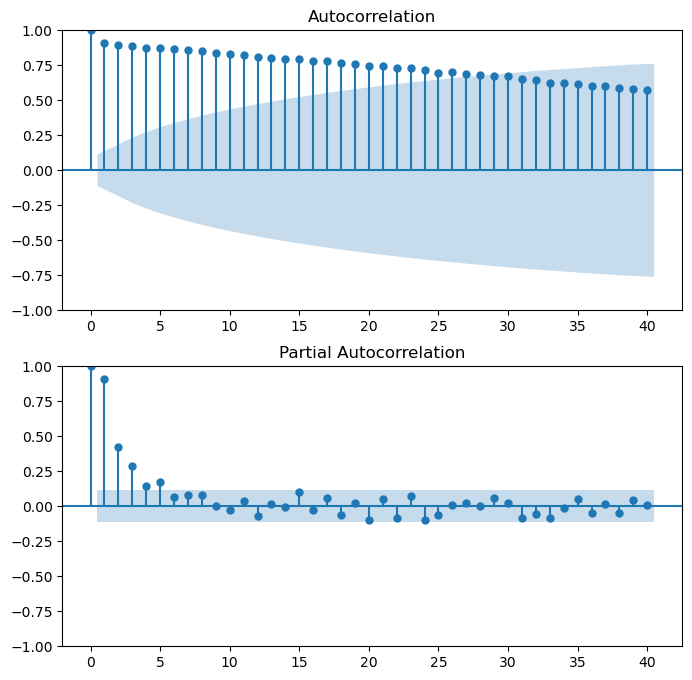

In [14]:
auto_partial_corr_plot(trends)

Note that the ACF decays slowly, as was the case with the random walk. In addition, the PACF shows significant values for several lags. This is the result of the trend creating dependency from one value to the next. Any time series with a trend is **not stationary**.

### Time Series with a Seasonal Component

Many real-world time series include a seasonal component. A seasonal component is a period variation in the values of the time series. The periods can be measured in years, months, days, days of the week, hours of the day, etc. Some examples of seasonal components of time series include:

- Option expiration dates in capital markets.
- Annual holidays which can affect transportation, utility use, shopping habits, etc.
- Weekend vs. business days, which account for volumes of certain transaction behavior.
- Month of the year which can affect employment statistics, weather, etc.   
- Super Bowl Sunday. 
- Sunspot cycles.   

Let's investigate the properties of a time series with a seasonal component. The code in the cell below creates and plots a time series with the sinusoidal seasonal component, a trend, and added White noise. Run this code and examine the results.

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_16009/68927163.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start = start, end = end, freq = freq)


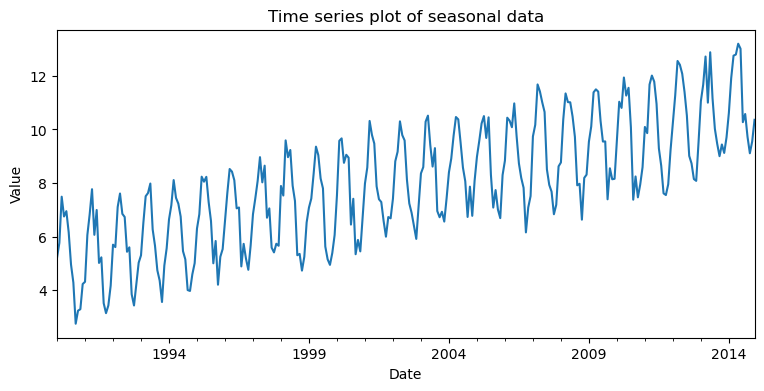

In [15]:
nr.seed(5544)
def seasonal_ts(start = '1-1990', end = '1-2015', freq = 'M', slope = 0.02, sd = 0.5, mean = 0):
    dates = pd.date_range(start = start, end = end, freq = freq)
    seasonal = pd.Series([slope*x for x in range(len(dates))],
                    index = dates)
    seasonal = seasonal + nr.normal(loc = mean, scale = sd, size = len(dates))
    seasonal = seasonal + [2.0*sin(pi*x/6) for x in range(len(dates))] + 5.0
    return(seasonal)

seasonal = seasonal_ts()
plot_ts(seasonal, 'seasonal data')

As expected, the time series looks like a noisy sine wave with a trend.

> **Exercise 32-3:** What does the distribution of values of the seasonal time series look like? What about the ACF and PACF of the seasonal time series? In the cell below, create and execute the code to examine the probability distribution, ACF, and PACF of this time series. 

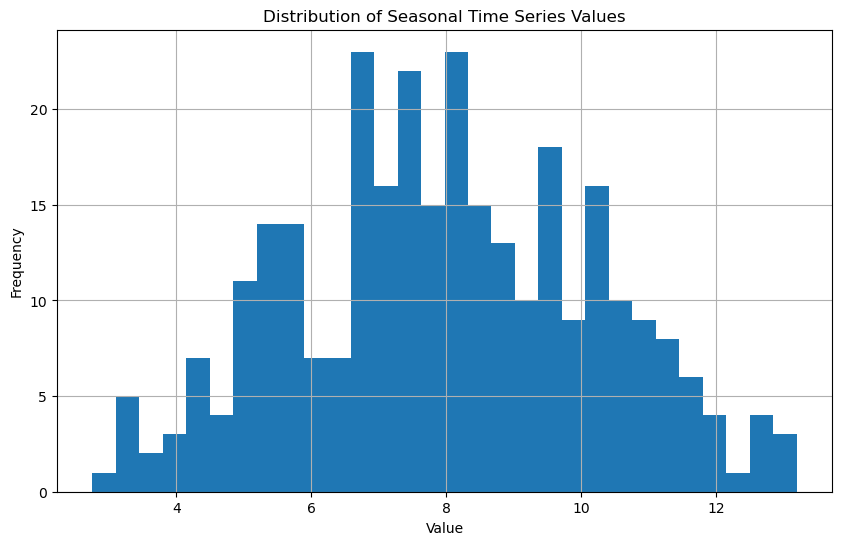

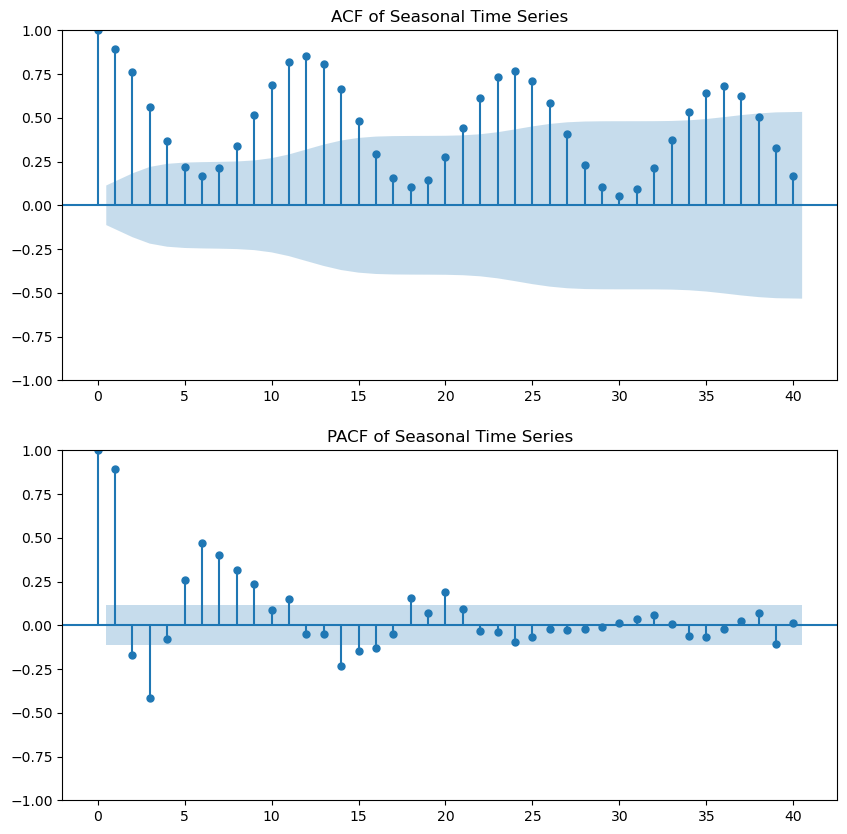

In [16]:
# Plot the distribution of the seasonal time series values
plt.figure(figsize=(10, 6))
seasonal.hist(bins=30)
plt.title('Distribution of Seasonal Time Series Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot ACF and PACF of the seasonal time series
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
splt.plot_acf(seasonal, lags=40, ax=axes[0])
splt.plot_pacf(seasonal, lags=40, ax=axes[1], method='yw')
axes[0].set_title('ACF of Seasonal Time Series')
axes[1].set_title('PACF of Seasonal Time Series')
plt.show()


> Answer the following questions:
> 1. How close to Normally distributed are the values of the seasonal time series? 
> 2. What do the ACF and PACF tell you about the periodicity of the series?      
> 3. Does the significance of the periodic behavior of the acf and pacf change with lag?  

> **Answers:**    
> 1. The histogram shows that the distribution of the values is somewhat but not perfectly normal. It has a multimodal appearance, which is expected due to the combination of a seasonal sinusoidal component and noise. The presence of this cyclic pattern causes certain values to appear more frequently, hence the multiple peaks in the histogram.    
> 2.  The ACF plot shows significant positive correlations at regular intervals (around every 6 lags), which corresponds to the seasonal pattern. This periodic behavior is due to the sinusoidal nature of the time series. The PACF shows a similar pattern, with strong correlations at early lags, particularly at lag 1 and lag 6, reinforcing the presence of seasonality with a 6-month cycle.       
> 3.  Yes, the significance of the ACF decreases gradually over time but remains significant at regular intervals (every 6 lags), indicating the continued influence of the seasonal component. The PACF shows significant spikes at lower lags, especially lag 1, and diminishes more quickly compared to the ACF, which is typical for a series with a strong seasonal component.    

## Stationarity       

As was previously mentioned, **a time series with statistical properties that are invariant in time is considered stationary**. There are a number of ways to determine if a time series is stationary. Conversely, one can be certain that a time series is not stationary if it has any of the following properties:     
1. Random walk.    
2. Trend.   
3. Seasonality.   
4. Non-constant variance.   

Note, however, that having a stationary series does not preclude the presence of serial correlations. Do not confuse these points! Many time series models focus on the serial correlation properties of time series but require stationarity.   

A simple model for a time series process with white noise can be written:   

\begin{align}
y_t &= \phi y_{t-1} + w_t\\
w_t &\sim \mathbb{N}(0,\sigma)
\end{align}

The above is an example of an **autoregressive model**, where the next value at the next time step depends on the current value. We will revisit these models in the next chapter.   

The change from time $t-1$ to time $t$ can easly be worked out by taking the differences: 

$$\Delta y_t = (1- \phi) y_{t-1} + w_t$$

The foregoing equation has a root at $\phi = 1$, known as the **unit root**. At the root the difference between the difference between $y_t$ and $y_{t-1}$ is just $w_t$, giving rise to a random walk, which is stochastic and **not stationary**:   

$$y_t = \sum_{i=1}^t w_i$$ 

This example gives us a way to create hypothesis tests for stationarity. We can test the hypothesis that there is a unit root to determine if a time series is stationary or not. However, there is another consideration we must deal with. There are, in fact, several ways to define a model for a stationary process:    

1. A **unit root test** as discused above.   

$$y_t = \phi y_{t-1} + w_t$$

2. A **unit root test with a constant**, which includes a constant value in the formulation. Often this constant is some initial value, $c=y_0$, or a mean value. 

$$y_t = c + \phi y_{t-1} + w_t$$

3. A **Trend stationary process**, which may or may not include a constant. This version is used to test if a process is **stationary about a deterministic trend**, $\beta$. 

$$y_t = c + \beta t + \phi y_{t-1} + w_t$$

Given the foregoing, one can see that it is **important to correctly specify the correct model** for the case you are investigating! Failure to do so will result in erroneous results.    

There is another significant issue one must be aware of when working with unit root tests. There can be only a small difference between a time series with a unit root, which is non-stationary, and a time series with a root close to a unit, which is a stationary time series. As a result, unit root tests are said to **lack power**. This lack of power can have serious implications, since a hypothesis test may not be able to reject a hypothsis of non-stationary, when the time series in fact is, or in other cases, the oposite might be true. In practice, it is best to perform a visual inspection of the properties of the time series and well as perform unit root tests.   

We will work with two of the many possible tests here:            

1. A commonly used test is the [**Augmented Dicky-Fuller test**](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) or **ADF** test. The ADF tests are unit root tests of the significance of a linear time series model. Coefficients represent components of the time series, such as trend and lagged differences, that make the series non-stationary. The null distribution is that the series is non-stationary.       

2. The [**Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test**](https://en.wikipedia.org/wiki/KPSS_test) is a unit root test for stationarity about a trend of time series. The null hypothesis is that the time series is trend stationary.    

For the examples here, we will focus on the unit root with a constant and unit root with the trend and a constant since Statsmodels supports both options for the foregoing tests.          

Execute the code in the cell below which applies the ADF and KPSS tests to the series created above using two regression models for the tests.    

In [17]:
def test_stationarity(series, regression_model='c', rounding=3):
    """Function to test the stationarity of time series using:
    1. Augmented Dicky Fuller test using AIC 
    2. KPSS test for constant
    
    Arguments:  
        Series: the time series to be evaluated.   
        regression_model: model to be used:   
            'c' - model with a constant   
            'ct' - model with a constant and trend  
        rounding: the number of digits to display in printed output.   
    """
    if regression_model not in ['c','ct']:    
        print('Error!: argument regression model must be one of {\'c\',\'ct\'}')
        return
    with warnings.catch_warnings(): 
        warnings.filterwarnings("ignore")
        kpss_test = kpss(series, regression=regression_model)
        ADF_test = adfuller(series, regression=regression_model, autolag="AIC")
    return [round(ADF_test[0],rounding), round(ADF_test[4]['5%'],rounding), round(ADF_test[1],rounding),
                                       round(kpss_test[0],rounding), round(kpss_test[1],rounding)]

def stationary_tests(series, names, regression_model='c', rounding=3):
    test_columns = ['ADF_statistic','ADF_conf_int','ADF_p_value','KPSS_statistic','KPSS_p_value']
    out = pd.DataFrame(index=names, columns=test_columns)    
    for ser, name in zip(series,names):  
        out.loc[name,:] = test_stationarity(ser, regression_model=regression_model, rounding=rounding)
    return out
        

time_series = [white,ts_periodic,walk,trends,seasonal]
names = ['white','ts_periodic','walk','trends','seasonal']

for model in ['c','ct']:
    print('\nFor model ' + model)
    print(stationary_tests(time_series, names, regression_model=model))  


For model c
            ADF_statistic ADF_conf_int ADF_p_value KPSS_statistic KPSS_p_value
white             -25.713       -2.866         0.0          0.231          0.1
ts_periodic        -2.727       -2.879       0.069          0.028          0.1
walk               -0.595       -2.871       0.872          2.439         0.01
trends             -0.249       -2.872       0.932          2.827         0.01
seasonal           -0.124       -2.872       0.947          2.725         0.01

For model ct
            ADF_statistic ADF_conf_int ADF_p_value KPSS_statistic KPSS_p_value
white             -25.733       -3.417         0.0          0.147        0.049
ts_periodic        -2.719       -3.437       0.228          0.028          0.1
walk               -1.636       -3.425       0.778          0.475         0.01
trends            -17.486       -3.425         0.0          0.092          0.1
seasonal           -3.575       -3.426       0.032          0.016          0.1


> **Exercise 32-4:** Examine these resutls and answer the following questions:    
> 1. For the constant model, given the value of the ADF and KPSS statistics and the p-values, for which of these time series can we reject the null hypothesis of non-stationarity and why? Pay particular attention to the differences between the ADF and KPSS tests.     
> 2. For the trend plus constant model, given the value of the ADF and KPSS statistics and the p-values, for which of these time series can we reject the null hypothesis of non-stationarity and why? Pay particular attention to the differences between the ADF and KPSS tests.     
> 3. Which series can we conclude is non-statonary for all tests and why does this result make sense?     
> 4. As was discussed above, unit root tests have low power. Based on p-values and known properties of the time series, which cases can you identify where poor, or unexpected, inferences would result?   

> **Answers:** 
> 1. White and (borderline ts_periodic) given low ADF p-values less than 0.05 and high KPSS p-values greater than 0.05.
> 2.  The trends and seasonal given low ADF p-values less than 0.05 and high KPSS p-values greater than 0.05.
> 3.  The random walk series is non-stationary in all tests (both constant and trend models). This result makes sense because random walks are inherently non-stationary, as each value depends on the previous one, causing the series to drift over time without reverting to a mean.   
> 4.  TS periodic as in both cases the ADF and KPSS values given conflicting conclusions.   

In the next two sections, we will explore decomposition methods for time series. The goal of these methods is to separate the non-stationary components and leave a stationary residual. The residual may have a significant serial correlation. In practice, this means that the trend and seasonal components must be estimated. Then the variance must be stabilized, so the variance is constant. 

To achieve these goals several methods can be used:     
1. Apply transformations to the variables, so that they are approximately Normally distributed with a constant variance in time.      
2. Decompose the time series into a trend, seasonal component, and residual.     
3. Use differencing operators to create a stationary product.    
4. Spectral decomposition of the time series into stationary frequency components. This method is discussed in a subsequent chapter.    

## STL Decomposition of Time Series

We have looked at the properties of several types of time series. 

- White noise series.
- Random walks.
- White noise series with trend.
- White noise series with seasonal component.

Next, we have to look into methods for decomposing time series data into its **trend, seasonal, and residual** components. This decomposition is necessary to remove nonstationary components from a time series so that further analysis can be performed. Failure to remove these components will result in poor models since the stationarity assumptions are violated.

A direct decomposition model is known as the **seasonal, trend and residual** or **STL** model. Not too surprisingly this model does the following:

- The trend is removed using a LOESS regression model. 
- The seasonal component is removed using a regression on periodic components.
- The remainder is known as the residual. 

The decomposition can be either **additive** or **multiplicative**. The additive model simply sums the components and is written:

$$TS(t) = S(t) + T(t) + R(t)$$

The multiplicative model multiplies the three components. This model is particularly useful in the common case where the **seasonal effect increases in proportion to the trend**. The multiplicative model is expressed:  

$$TS(t) = S(t)\ *\ T(t)\ *\ R(t)$$

Additive models are linear in their components and are therefore easier to work with. We can transform the multiplicative model into an additive model by a logarithm of both sides. The result is another additive model:  

\begin{align}
log(TS(t)) &= log(S(t)) + log(T(t)) + log(R(t)) \\
&= S^l(t) + T^l(t) + R^l(t)
\end{align}

You can find additional details of this model in [Rob Hyndman's lecture notes](http://robjhyndman.com/uwafiles/5-Cross-validation.pdf).    

Notice that there is no term in the STL model for a random walk. For random walk components, differencing operators are applied, which are addressed in the next section. 

### An STL decomposition example

Let's try this out on a time series which has a seasonal, trend and white noise residual component, using [statsmodels.tsa.seasonal.seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html). The algorithm requires that we provide the **period of the seasonal component**. The code in the cell below models the trend and a monthly seasonal component. Run the code to compute the model and examine the results.

               resid     trend  seasonal
1990-01-31       NaN       NaN  0.088263
1990-02-28       NaN       NaN  0.868177
1990-03-31       NaN       NaN  1.841748
1990-04-30       NaN       NaN  1.890479
1990-05-31       NaN       NaN  1.680063
1990-06-30       NaN       NaN  1.071378
1990-07-31 -0.008561  5.055444 -0.089527
1990-08-31  0.265281  5.030225 -1.007874
1990-09-30 -0.633090  5.015192 -1.627822
1990-10-31  0.188628  5.030402 -1.977487
1990-11-30  0.008559  5.036028 -1.749506
1990-12-31  0.188107  5.033946 -0.987893


,resid,trend,seasonal
2014-01-31,-0.403390,10.929728,0.088263
2014-02-28,0.057525,10.986432,0.868177
2014-03-31,-0.153706,11.062757,1.841748
2014-04-30,-0.176517,11.079082,1.890479
2014-05-31,0.432598,11.083376,1.680063
2014-06-30,0.809460,11.128438,1.071378
2014-07-31,NaN,NaN,-0.089527
2014-08-31,NaN,NaN,-1.007874
2014-09-30,NaN,NaN,-1.627822
2014-10-31,NaN,NaN,-1.977487


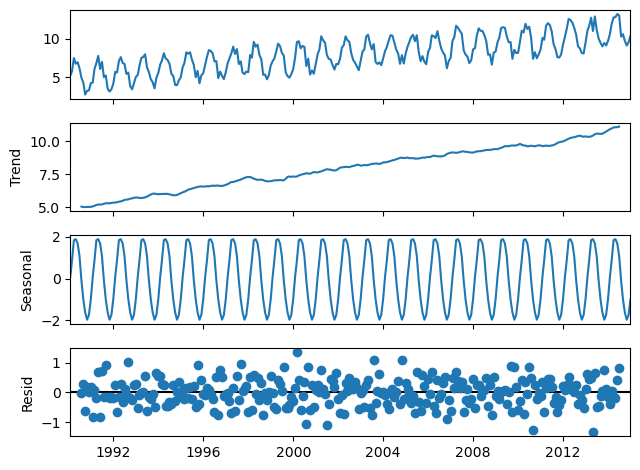

In [18]:
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) 
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

decomp = decomp_ts(seasonal) 
print(decomp[:12])
decomp[-12:]

You can see the time series is now decomposed into the three components. Notice that the first and last 6 values of the trend and seasonal component are missing. These missing values arise from the estimation of the seasonal component which must be truncated at the ends of the time series. We must take these missing values into account when performing any analysis. 

It appears that the STL process has removed most of the trend and seasonal components of the time series for the most part. We can do further analysis to understand these results. To do so, execute the code in the cell below to display some evaluation plots and summary statistics for the residual series. Notice that the first and last 6 samples are censored from the residual series which contain `nan` values.    

      lb_stat     lb_pvalue
1   14.317477  1.544245e-04
2   16.103461  3.185501e-04
3   20.582041  1.285561e-04
4   23.712397  9.120761e-05
5   39.312677  2.054378e-07
6   40.040931  4.471556e-07
7   40.340125  1.083486e-06
8   41.476648  1.697539e-06
9   43.194749  1.985228e-06
10  44.382321  2.809876e-06
11  47.571656  1.701891e-06
12  52.620651  4.811323e-07
13  57.711656  1.342802e-07
14  58.107400  2.512182e-07
15  58.762041  4.111742e-07
16  59.557985  6.211589e-07
17  60.080975  1.019052e-06
18  60.160876  1.927136e-06
19  61.807404  1.996675e-06
20  66.537142  6.625424e-07
21  66.548611  1.242571e-06
22  66.548858  2.283140e-06
23  66.642709  3.966423e-06
24  67.220361  5.717609e-06
25  70.258691  3.521888e-06
26  70.549444  5.516679e-06
27  70.554656  9.345358e-06
28  71.593526  1.111157e-05
29  72.504840  1.366888e-05
30  72.517899  2.215896e-05
31  74.305993  2.036504e-05
32  74.388592  3.163111e-05
33  74.405543  4.937515e-05
34  74.405577  7.630249e-05
35  74.611659  1.094

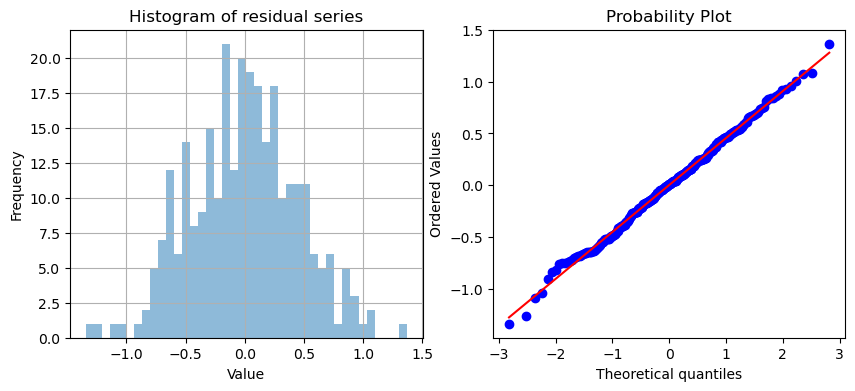

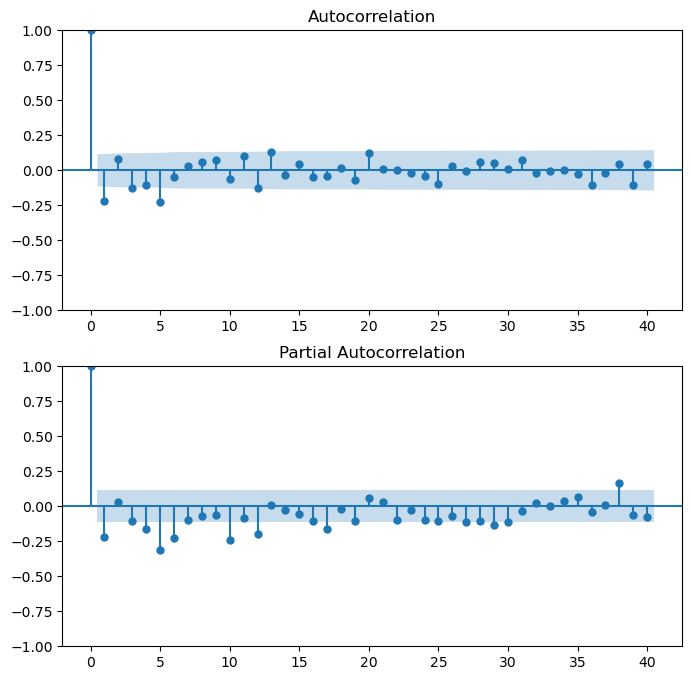

In [19]:
def evaluate_resids(residual_series, title='residual series', regression_model='c', ljungbox=True, ADF=True):
    dist_ts(residual_series, title) 
    auto_partial_corr_plot(residual_series)
    if(ljungbox==True): print(acorr_ljungbox(residual_series, lags=40, model_df=0))
    if(ADF==True): print(stationary_tests([residual_series], [title], regression_model=regression_model))


evaluate_resids(decomp[6:-6].resid)    

Notice the following observations about these results:   
1. There is some significant autocorrelation, as evidenced by the Ljung Box test, so the residuals are not white noise.    
2. The residuals appear to be close to Normally distributed.     
3. The ADF and KPSS tests indicate that the residuals are stationary.   

### Another STL Example      

We will now try an example using some real-world data. The data are for the production of certain dairy products in the State of California, compiled by the California Department of Agriculture. To load these data and display the head of the data frame and plots of the milk produciton and log milk production.     

,Unnamed: 0,Year.Month,Month.Number,Year,Month,Cottagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,LogMilkProd
1995-01-01,1,1995.01,1,1995,Jan,4.370,51.595,2.112,0.9803,0.747635
1995-02-01,2,1995.02,2,1995,Feb,3.695,56.086,1.932,0.8924,0.658556
1995-03-01,3,1995.03,3,1995,Mar,4.538,68.453,2.162,0.8924,0.771034
1995-04-01,4,1995.04,4,1995,Apr,4.280,65.722,2.130,0.8967,0.756122
1995-05-01,5,1995.05,5,1995,May,4.470,73.730,2.227,0.8967,0.800655
...,...,...,...,...,...,...,...,...,...,...
2013-08-01,224,2013.08,8,2013,Aug,2.169,78.382,3.400,1.6273,1.223775
2013-09-01,225,2013.09,9,2013,Sept,2.193,74.871,3.197,1.5519,1.162213
2013-10-01,226,2013.10,10,2013,Oct,2.284,70.011,3.338,1.5566,1.205372
2013-11-01,227,2013.11,11,2013,Nov,1.865,61.394,3.275,1.7537,1.186318


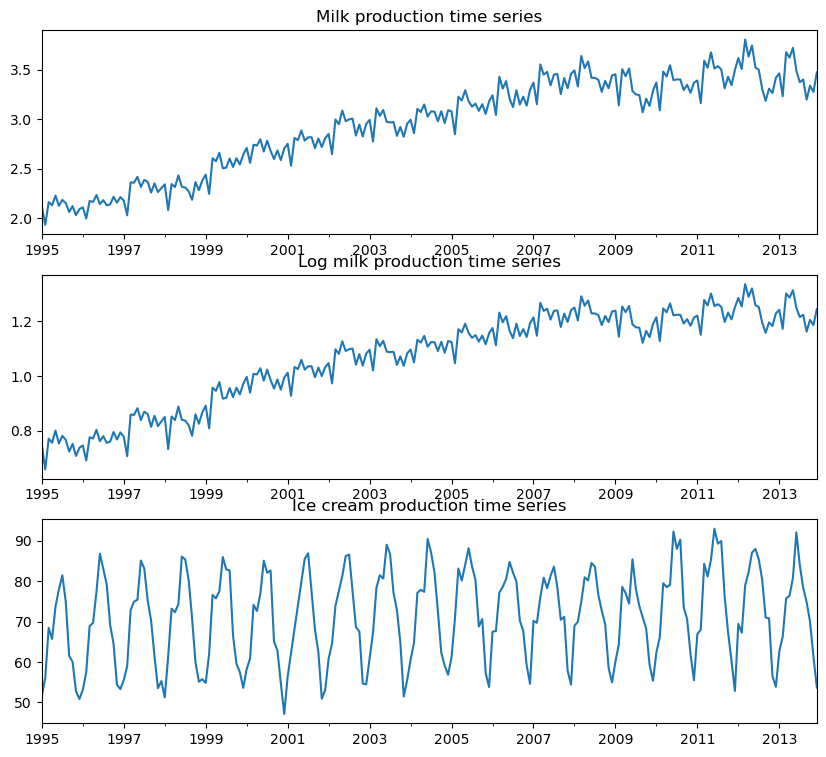

In [20]:
CA_dairy = pd.read_csv('cadairydata.csv')
CA_dairy.index = pd.to_datetime('1 ' + CA_dairy['Month.Number'].astype(str) + ' ' + CA_dairy['Year'].astype(str), format='%d %m %Y')
CA_dairy['LogMilkProd'] = np.log(CA_dairy['Milk.Prod'])

_,ax = plt.subplots(3,1, figsize=(10,9))
cols =['Milk.Prod','LogMilkProd','Icecream.Prod']
titles = ['Milk production time series','Log milk production time series','Ice cream production time series']
for ax_i, col, title in zip(ax, cols, titles):
    CA_dairy[col].plot(title=title, ax=ax_i)
    
CA_dairy    

There are several key observations that are important when working with these time series.   
1. None of these series are stationary. At the minimum, both the milk and ice cream series exhibit seasonal behavior. There is a strong trend in milk production and a possible trend in ice cream production.     
2. The variance of the milk production series is not constant. It appears that the log transformation of this series stabilizes the variance.     

> **Exercise: 32-5:** You will now apply STL decomposition to the log milk time series and evaluate the results by the following steps:    
> 1. Compute the decomposition of the log milk time series, display the results, and save them to a variable `decomp_milk`.

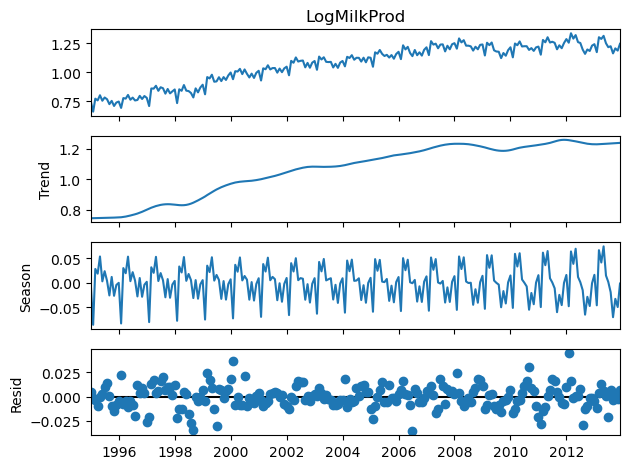

In [22]:
from statsmodels.tsa.seasonal import STL

stl = STL(CA_dairy['LogMilkProd'], seasonal=13)
decomp_milk = stl.fit()

# Display the decomposition results
decomp_milk.plot()
plt.show()


> 2. Use the `evaluate_resids` function to the residuals to evaluate the decomposition of the time series.

       lb_stat     lb_pvalue
1    32.347330  1.289342e-08
2    32.848886  7.361308e-08
3    36.817923  5.028150e-08
4    43.650988  7.581036e-09
5    44.028735  2.285322e-08
6    49.157709  6.933215e-09
7    52.784298  4.089038e-09
8    54.361304  5.874499e-09
9    54.587666  1.459378e-08
10   57.389646  1.126135e-08
11   58.030609  2.147828e-08
12   71.851963  1.440054e-10
13   81.391172  6.034922e-12
14   83.219955  7.121412e-12
15   84.290735  1.137376e-11
16   84.334926  2.728041e-11
17   85.358480  4.222224e-11
18   86.106221  7.168426e-11
19   87.046473  1.101975e-10
20   92.193434  3.057674e-11
21   95.606178  1.711831e-11
22   95.609504  3.738403e-11
23   97.573988  3.681992e-11
24  107.249769  1.698655e-12
25  107.307977  3.586603e-12
26  108.917226  4.043561e-12
27  108.938105  8.383998e-12
28  109.123944  1.601217e-11
29  109.275258  3.046869e-11
30  113.234680  1.356756e-11
31  113.375184  2.550431e-11
32  114.915653  2.806210e-11
33  116.392621  3.143510e-11
34  116.484242

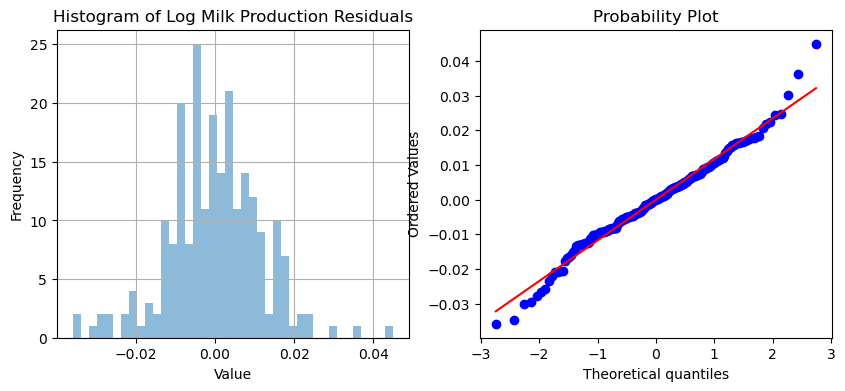

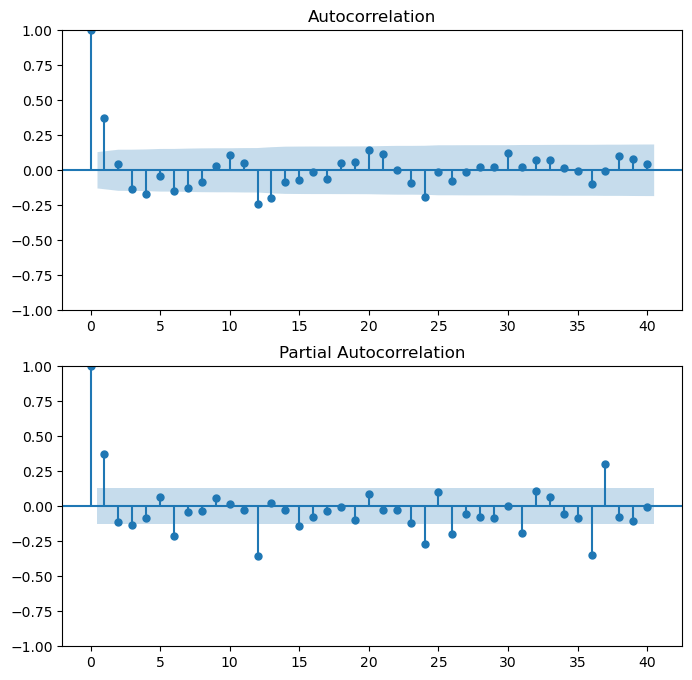

In [23]:
evaluate_resids(decomp_milk.resid, title='Log Milk Production Residuals')


> Examine these results and answer the following questions:     
> 1. Do the ACF, PACF, and Ljung-Box tests show evidence of serial correlation in the residuals, and how do these values compare to the original series?    
> 2. Is the distribution of the residuals close to a Normal distribution?      
> 3. Based on the ADF and KPSS statistics and p-values are the residuals stationary and why?  

> **Answers:**    
> 1. The ACF and PACF plots show that there is minimal evidence of serial correlation in the residuals. The residual series is fairly close to white noise. Additionally, the Ljung-Box test statistics (p-values) are all significantly small (below 0.05), indicating there is some autocorrelation present in the residuals, but it's greatly reduced compared to the original series.      
> 2. Yes, based on the histogram and probability plot, the residuals appear to be close to Normally distributed. The histogram is approximately bell-shaped, and the probability plot shows the residuals mostly align along the diagonal line, further supporting the assumption of normality.     
> 3. The ADF test p-value is 0.0 (indicating that the null hypothesis of non-stationarity can be rejected), and the KPSS test p-value is 0.1 (indicating the residuals are stationary under the null hypothesis). This suggests that the residuals are stationary, as both tests agree on the stationarity of the residual series.    

## Differencing operators and random walks

We have just seen how the trend and seasonal components of a time series can be found using a decomposition model. Is there an alternative? Yes, **difference operators** can be used to remove seasonal, and random walk components. Deterministic and stochastic trend components are modeled using other methods, as is discussed in the next chapter.     

Difference operators can be over any number of lags. Lag 1 difference operators can be applied to remove random walks. Seasonal components can be removed by taking differences in the seasonal period. Further, we can apply difference operators more than once to the same series. For example, one can apply the following process:      
> 1. Apply difference operators of the seasonal period to remove the seasonal components.       
> 2. Test for stationarity of the resulting series.    
> 3. Apply another first difference operator to remove random walk components.    
> 4. Test for stationarity of the resulting series.   

For a random walk, a **first order difference operator** transforms the time series to a series of the **innovations or shocks**. An example will illustrate this point. Consider the plot below of the first-order differences of the random walk time series we explored earlier. The differences are computed using the Pandas [diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) function. A first order difference series is one time-step shorter than the original series. Therefore the first sample is removed from the difference series with the *[1:]* operator. 

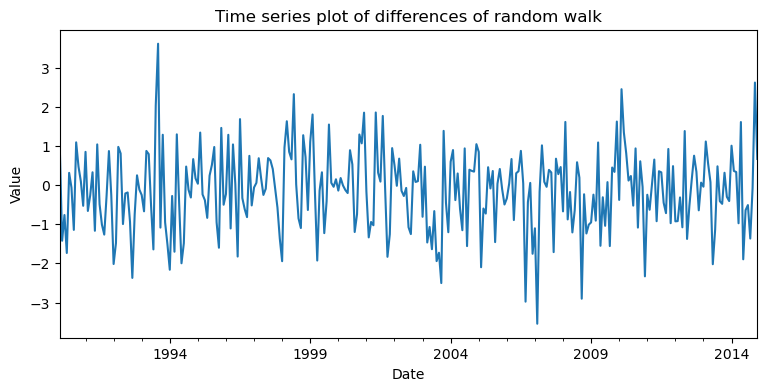

In [24]:
walk_diffs = walk.diff()[1:]
_=plot_ts(walk_diffs, 'differences of random walk')

The difference series looks rather, random. What are the statistical properties? Is this now white noise? To find out, we will plot the ACF and PACF using the code in the cells below. 

> **Exercise 32-6:** The question is what are the statistical properties of the remainder series the first order differencing operator has been applied. Display of the resulting series using the `evaluate_resids`. **Hint:** You will need to remove the first value from the difference series since the difference operator cannot work on the first element of a time series. 

        lb_stat      lb_pvalue
1     72.643181   1.553427e-17
2     83.691478   6.708517e-19
3     83.852175   4.576341e-18
4     93.622720   2.236742e-19
5    122.130254   1.110273e-24
6    182.553708   9.731340e-37
7    210.044587   8.538602e-42
8    220.296532   3.333333e-43
9    220.301073   1.808969e-42
10   230.951984   5.424285e-44
11   292.632295   3.119850e-56
12   466.130994   3.536116e-92
13   532.861031  1.517798e-105
14   543.041198  6.843122e-107
15   543.094240  4.235721e-106
16   552.552773  2.586840e-107
17   577.321326  8.981980e-112
18   633.759498  6.216955e-123
19   660.672986  7.629348e-128
20   669.061398  7.711371e-129
21   669.072980  4.497774e-128
22   678.435886  2.738418e-129
23   741.621305  7.447186e-142
24   913.748213  1.775266e-177
25   976.188857  6.534112e-190
26   984.252279  8.083735e-191
27   984.294572  4.924408e-190
28   993.416914  3.538277e-191
29  1018.206525  1.228350e-195
30  1071.769464  3.517900e-206
31  1099.088254  3.571174e-211
32  1106

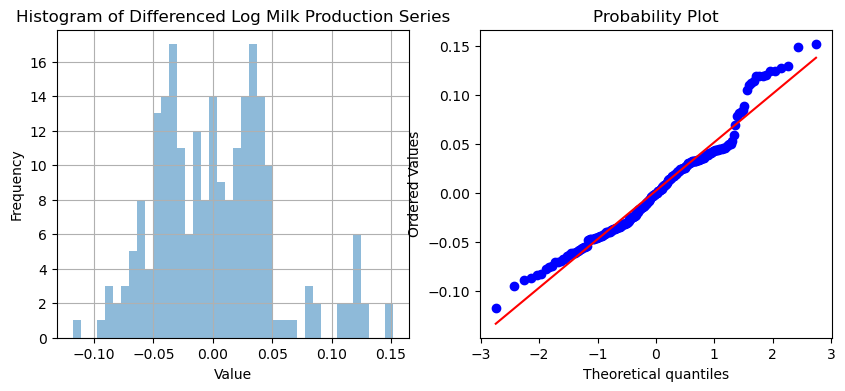

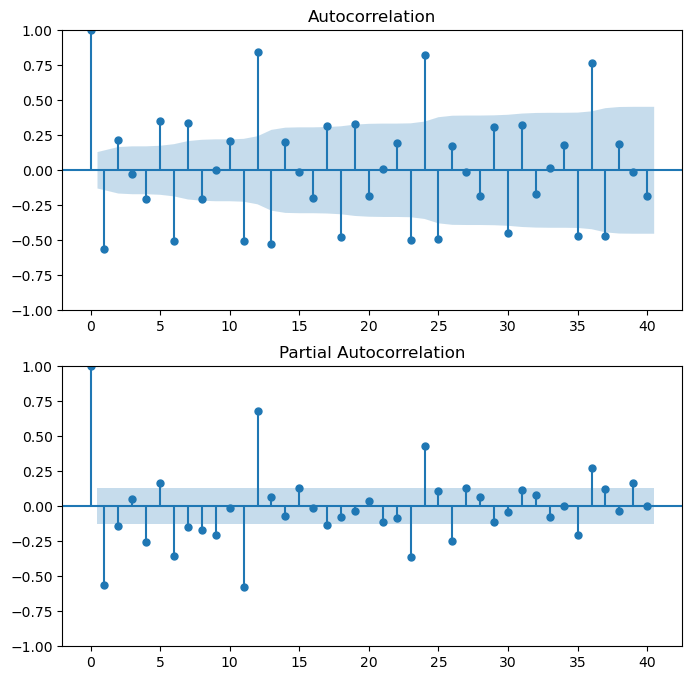

In [25]:
diff_milk = CA_dairy['LogMilkProd'].diff()[1:]

evaluate_resids(diff_milk, title='Differenced Log Milk Production Series')

> Examine your results and answer the following questions:
> 1. Do the ACF, PACF, and Ljung-Box test show evidence of serial correlation in the residuals, and how do these values compare to the original series?    
> 2. Is the distribution of the residuals close to a Normal distribution?      
> 3. Based on the ADF and KPSS statistics and p-values are the residuals stationary and why?  

> **Answers:**      
> 1. The ACF and PACF plots show a rapid decay, indicating a significant reduction in serial correlation compared to the original series. The Ljung-Box test gives very low p-values, suggesting that some serial correlation is still present, but it's much less pronounced than in the original series. This suggests that differencing has removed much of the autocorrelation, though not entirely.   
> 2.  Yes, the histogram of residuals is roughly symmetric and bell-shaped, and the probability plot shows points closely aligned with the theoretical quantile line, indicating that the residuals are approximately normally distributed.     
> 3.  Yes, the ADF test has a very low p-value (0.002), which rejects the null hypothesis of a unit root, indicating that the differenced series is stationary. Additionally, the KPSS test has a p-value of 0.136, which is above the critical value (0.05), meaning that we fail to reject the null hypothesis of stationarity. Hence, the differenced series is considered stationary based on both tests.   

### Example: Differencing the milk production time series        

We have already observed that the log-milk production time series has both trend and seasonality. We will now explore if the seasonality can be modeled with a differencing operator. A second question is if the resulting series is stationary.      

To start, execute the code in the cell below to perform the following operations on the log milk production series:     
1. Plot the log milk production time series.      
2. Display ACF and PACF plots.   
3. Compute and display the ADF and KPSS tests.    

Execute this code. 

,ADF_statistic,ADF_conf_int,ADF_p_value,KPSS_statistic,KPSS_p_value
Log Milk Production Series,-2.318,-2.875,0.166,2.2,0.01


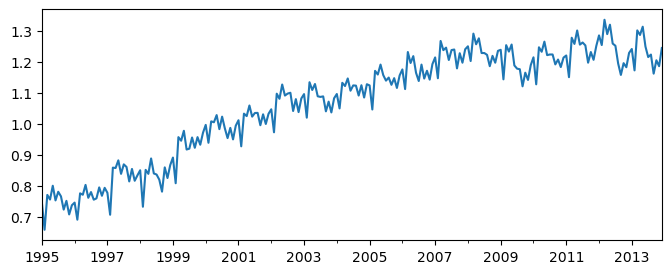

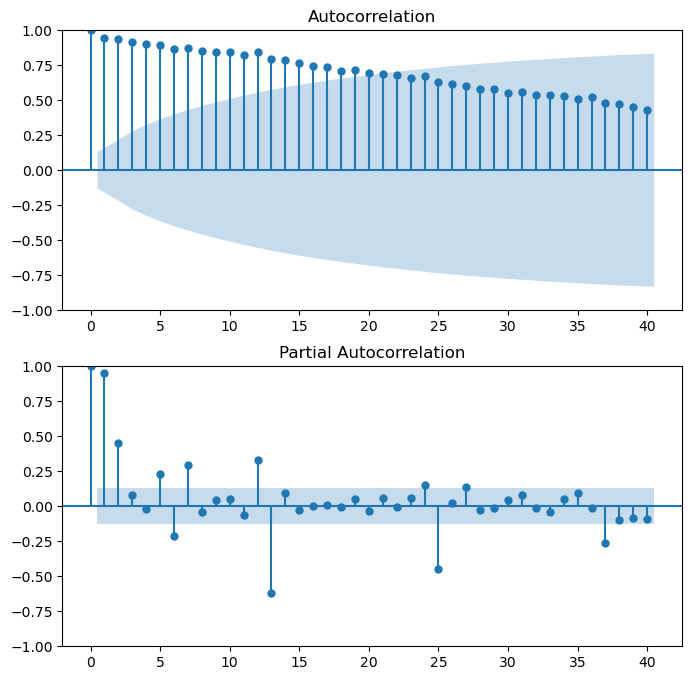

In [26]:
_,ax = plt.subplots(figsize=(8,3))
CA_dairy['LogMilkProd'].plot(ax=ax)
auto_partial_corr_plot(CA_dairy['LogMilkProd'])
stationary_tests([CA_dairy['LogMilkProd']], ['Log Milk Production Series'])

Examine these results, noticing the following:     
1. Not surprisingly, given the trend and seasonal behavior, the ADF and KPSS tests indicate that the series is not stationary. Further, the ACF shows the effect of the trend and the PACF has peaked at multiples of 12 lags.    
2. The variance of the log-transformed series appears to be fairly constant.    

> **Exercise 32-7:** You will now determine if seasonal differencing can provide a reasonable. To get started get these steps:     
> 1. Compute a difference series using period of the seasonal behavior as an argument to the [pandas.DataFrame.diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) method.        
> 2. Display a time series plot of the difference series.      
> 3. Apply the `evaluate_resids` function to the difference series.    
> Execute your code.    

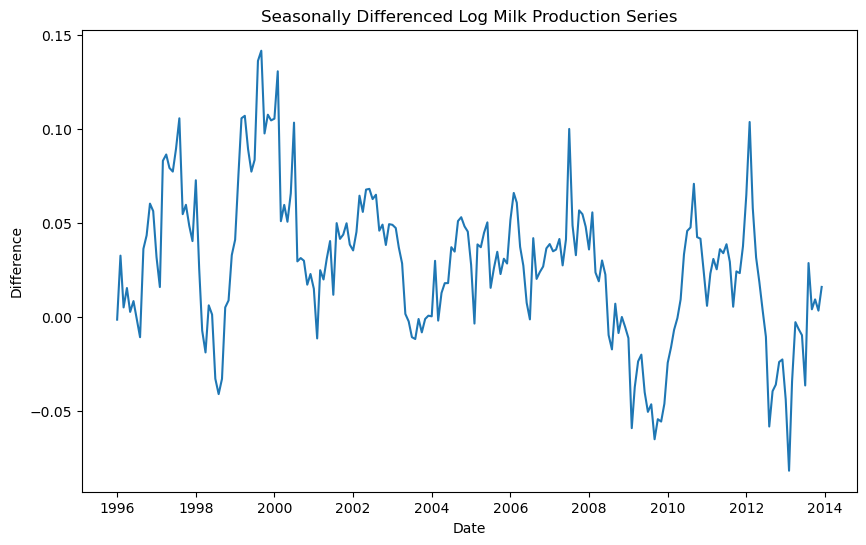

       lb_stat      lb_pvalue
1   155.011766   1.391947e-35
2   274.174653   2.908911e-60
3   370.895836   4.453740e-80
4   448.403690   9.614968e-96
5   513.610239  9.209949e-109
6   551.908134  5.475989e-116
7   573.210586  1.426686e-119
8   584.291638  5.569267e-121
9   589.611107  3.552013e-121
10  591.484926  1.174945e-120
11  591.494090  9.238710e-120
12  597.178415  4.244760e-120
13  603.198854  1.594584e-120
14  607.872957  1.122171e-120
15  613.117767  5.789651e-121
16  617.881350  3.676080e-121
17  623.915886  1.223058e-121
18  627.702394  1.190155e-121
19  630.133430  2.187314e-121
20  631.221586  7.535306e-121
21  631.897558  3.093326e-120
22  632.415073  1.338694e-119
23  632.510762  6.942579e-119
24  632.683817  3.391115e-118
25  634.455615  7.503130e-118
26  636.087740  1.743644e-117
27  639.433625  1.747634e-117
28  644.126265  9.047875e-118
29  650.503148  2.064817e-118
30  660.473955  8.352318e-120
31  669.205007  6.081293e-121
32  680.143796  1.531944e-122
33  692.24

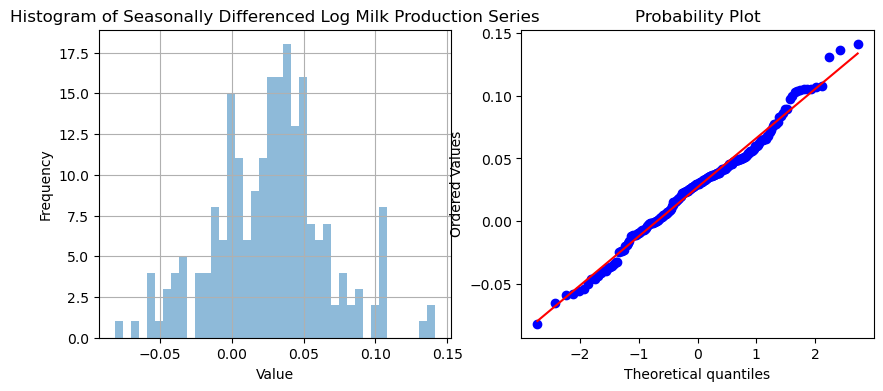

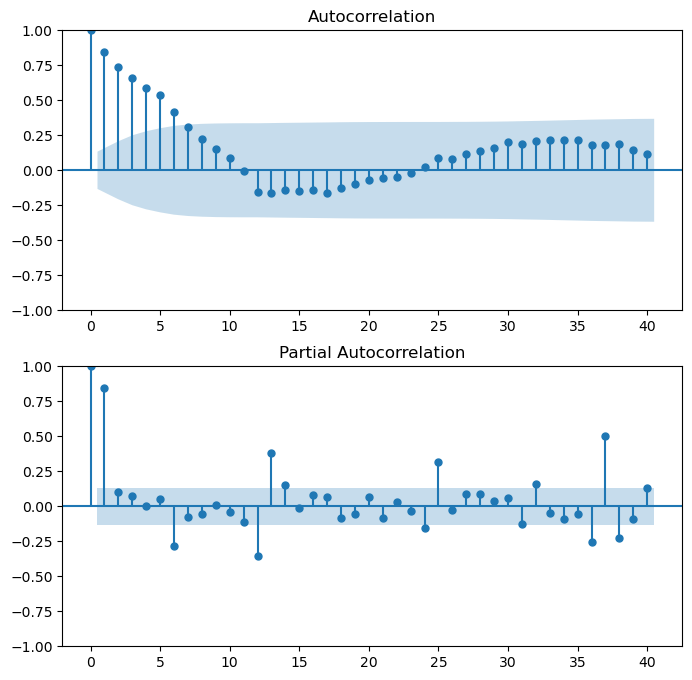

In [27]:
# Compute the seasonal difference using a period of 12 (assuming monthly data)
seasonal_diff = CA_dairy['LogMilkProd'].diff(12)

# Plot the seasonal difference time series
plt.figure(figsize=(10, 6))
plt.plot(seasonal_diff)
plt.title('Seasonally Differenced Log Milk Production Series')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.show()

evaluate_resids(seasonal_diff.dropna(), title="Seasonally Differenced Log Milk Production Series")


> Carefully examine your results and answer these questions:  
> 1. Do the ACF, PACF, and Ljung-Box tests show evidence of serial correlation in the residuals, and how do these values compare to the original series?    
> 2. Is the distribution of the residuals close to a Normal distribution?      
> 3. Based on the ADF and KPSS statistics and p-values are the residuals stationary and why?   
> 4. Given your answer to the preceding question, is there any point in taking another difference of difference series?  

> **Answers:**     
> 1.   The ACF and PACF plots show reduced autocorrelation compared to the original series. However, some residual autocorrelation remains, especially at lower lags, though it is less pronounced than before. The Ljung-Box p-values are still very small, suggesting that there is still some significant serial correlation present in the residuals, even after seasonal differencing.
> 2.  The probability plot indicates that the residuals are reasonably close to a normal distribution, but there are some deviations, especially in the tails. The histogram of the residuals also suggests a somewhat symmetric distribution around zero, with a shape that resembles a normal distribution, but with some potential outliers.  
> 3.   The ADF p-value (0.048) suggests that we can reject the null hypothesis of a unit root, meaning the series is likely stationary. The KPSS p-value (0.615) also suggests that we fail to reject the null hypothesis that the series is stationary around a trend. Therefore, the seasonally differenced log milk production series appears to be stationary based on both tests.     
> 4.    Since the series is now stationary based on the ADF and KPSS tests, further differencing is unnecessary. No additional differencing would likely provide any meaningful improvement in the stationarity of the series.

#### Copyright 2018, 2019, 2020, 2021, 2022, 2023 Stephen F Elston. All rights reserved.  